## 이전 모델 성능

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("../data/diabetes.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

split_count = int(len(X) * 0.8)
X_train, X_test = X[:split_count], X[split_count:]
y_train, y_test = y[:split_count], y[split_count:]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

print(f"model accuracy: {accuracy}")

model accuracy: 0.7077922077922078


[Text(0.5705341940976163, 0.9705882352941176, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1881739500567537, 0.9117647058823529, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.036322360953461974, 0.8529411764705882, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.018161180476730987, 0.7941176470588235, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.009080590238365494, 0.7352941176470589, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.02724177071509648, 0.7352941176470589, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.018161180476730987, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.036322360953461974, 0.6764705882352942, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.05448354143019296, 0.7941176470588235, 'BMI <= 9.8\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(

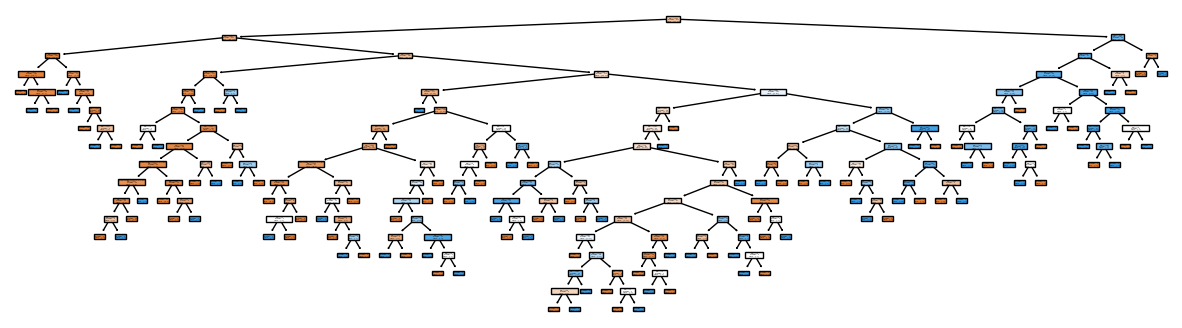

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = df.columns[:-1].tolist()
label = df.columns[-1]

plt.figure(figsize=(15, 4))
plot_tree(model, feature_names=feature_names, filled=True)

## 데이터 탐색 결과

- 각 데이터와 발병률과의 상관관계를 파악할 수 있다.
- 데이터의 모수가 적은 경우, 해당 케이스를 기준으로 학습을 하는게 의미가 있을까?

/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_50662/470002219.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[column_name], ax=axes[row][col])
/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_50662/470002219.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

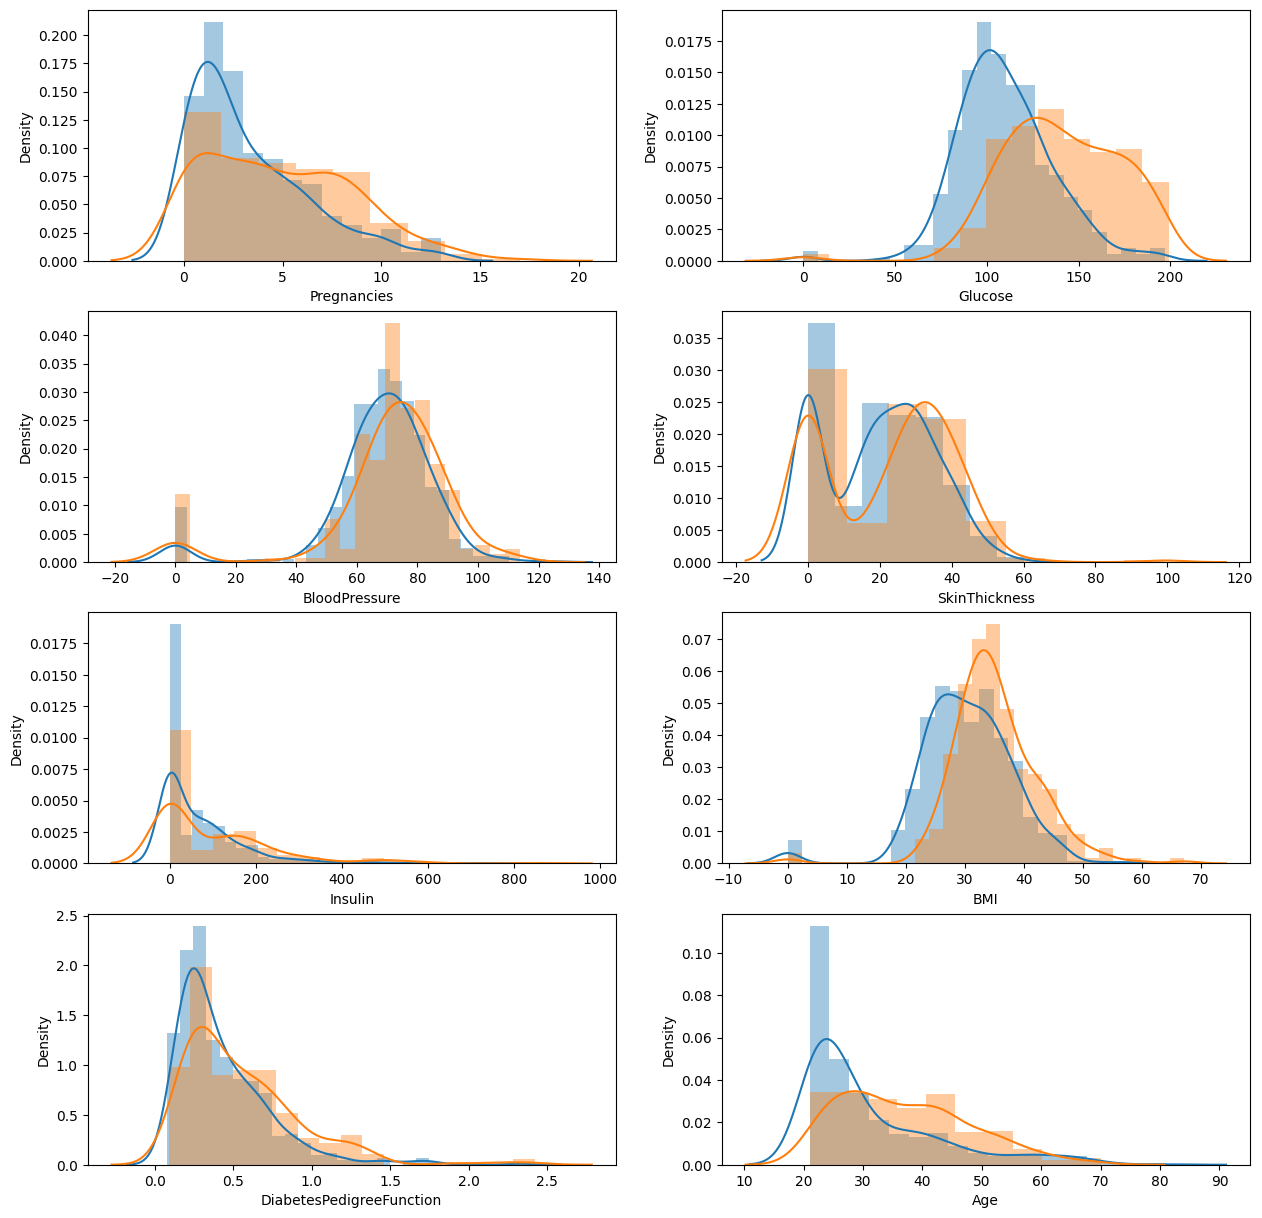

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Pregnancies_high"] = df["Pregnancies"] > 6
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]

# Outcome, Pregnancies_high 제외
column_names = df.columns[:-2].tolist()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, column_name in enumerate(column_names):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[column_name], ax=axes[row][col])
    sns.distplot(df_1[column_name], ax=axes[row][col])


# Feature Engineering

## 임신 횟수 - 수치형 변수를 범주형 변수로 만들기

In [35]:
# 임신 횟수를 범주로 변경
df = pd.read_csv("../data/diabetes.csv")
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [40]:
# 데이터 구분
split_count = int(len(X) * 0.8)
train = df[:split_count].copy()
test = df[split_count:].copy()

print(train.shape, test.shape)
print("---------")

feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")  # 범주형인 Pregnancies_high 로 대체
feature_names.remove("Outcome")
print(feature_names)

label_name = "Outcome"

(614, 10) (154, 10)
---------
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high']


[Text(0.5695274203431373, 0.9705882352941176, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1899126838235294, 0.9117647058823529, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.0392156862745098, 0.8529411764705882, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.0196078431372549, 0.7941176470588235, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.00980392156862745, 0.7352941176470589, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.029411764705882353, 0.7352941176470589, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.0196078431372549, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0392156862745098, 0.6764705882352942, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.058823529411764705, 0.7941176470588235, 'BloodPressure <= 56.0\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 T

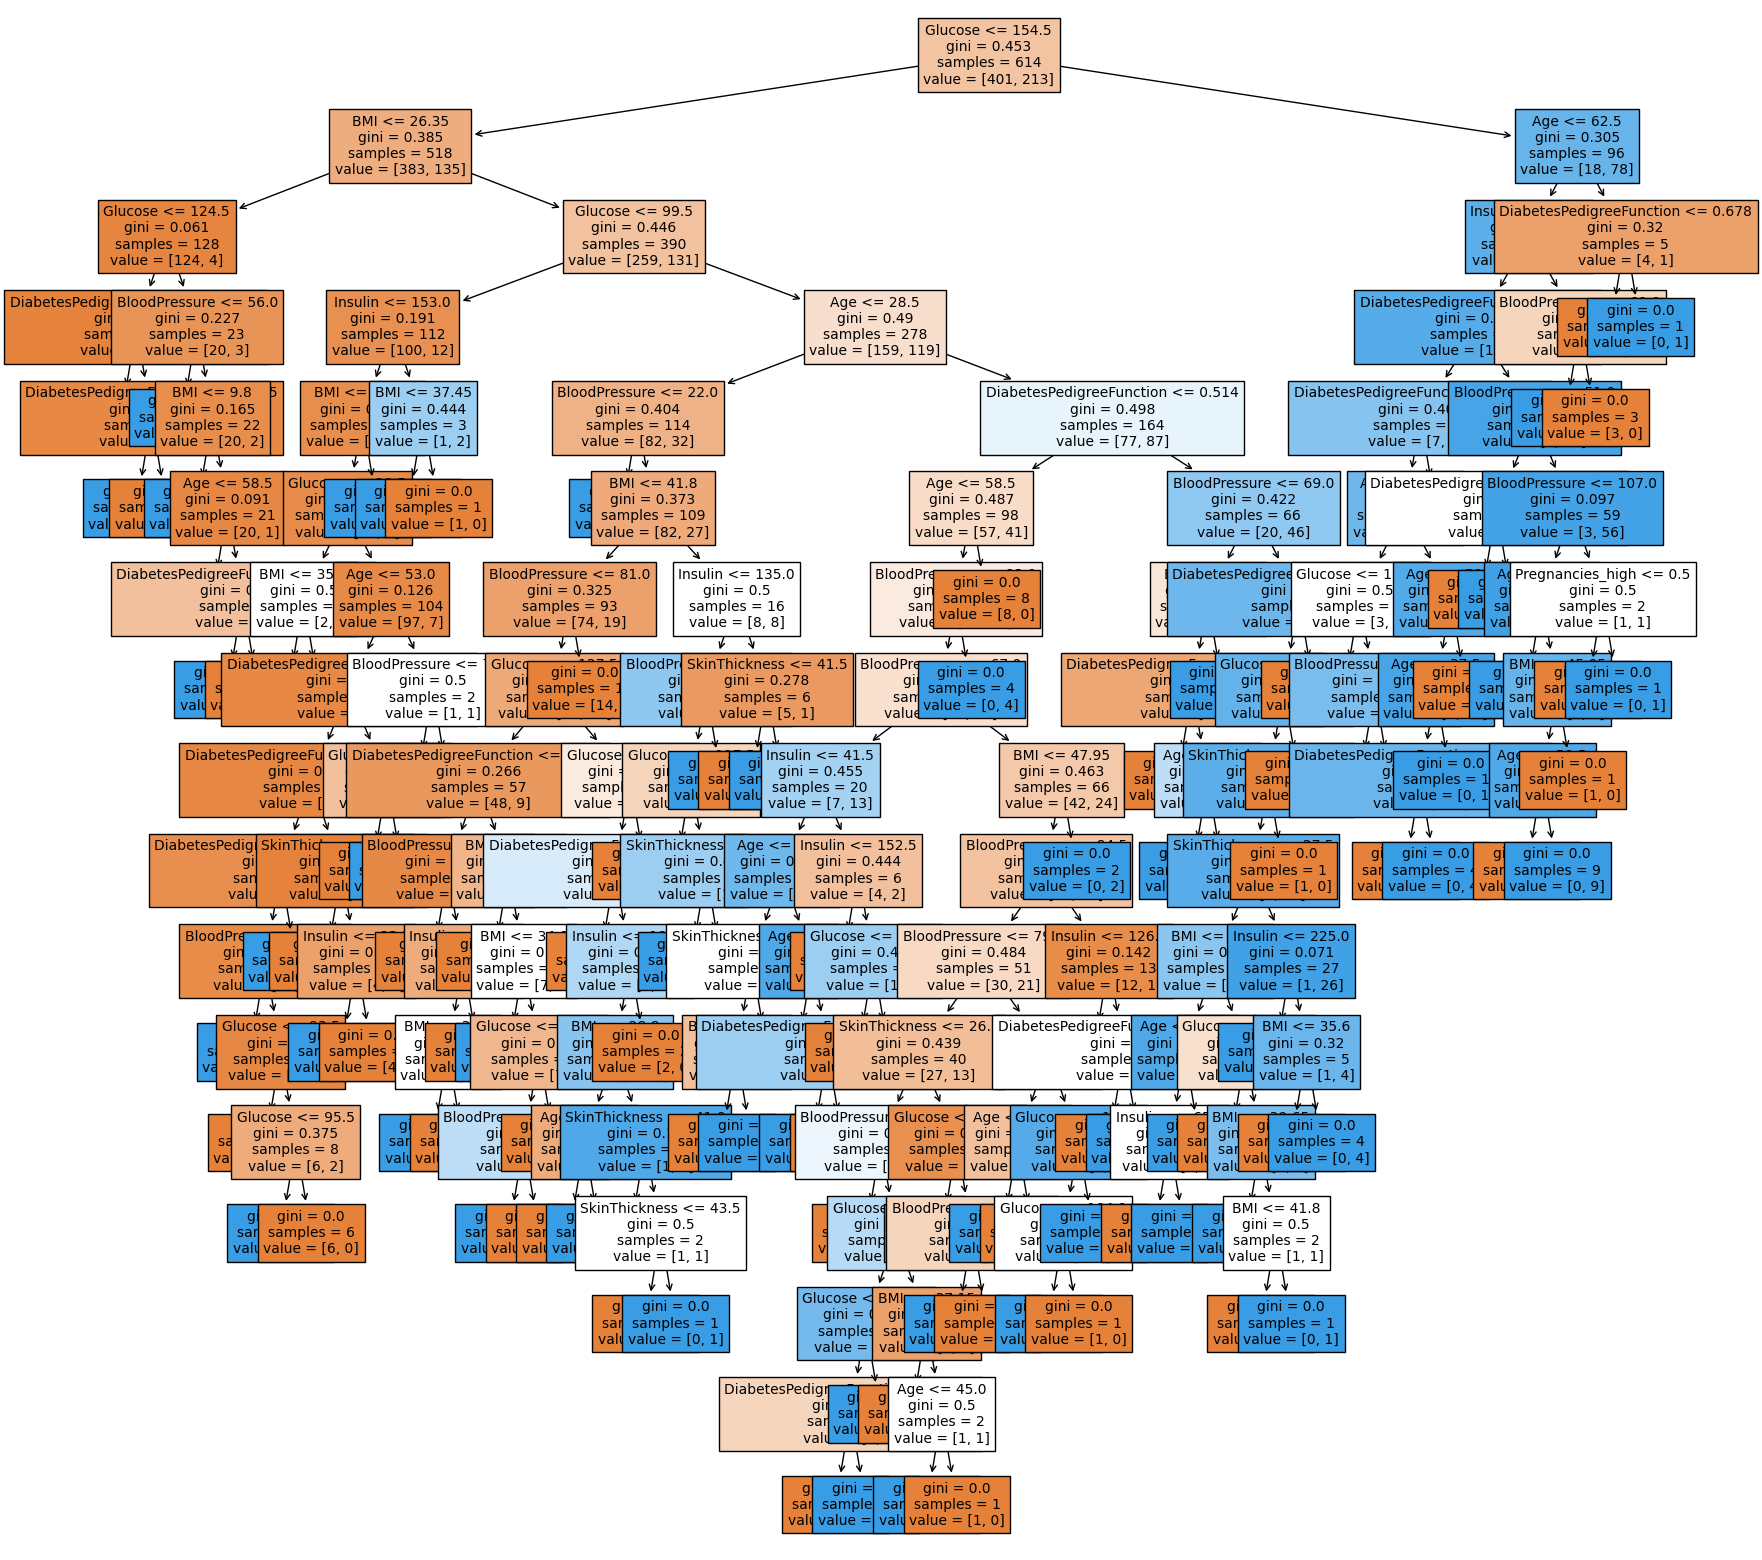

In [51]:
# 학습 및 예측
X_train, y_train = train[feature_names], train[label_name]
X_test, y_test = test[feature_names], test[label_name]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
)

<Axes: >

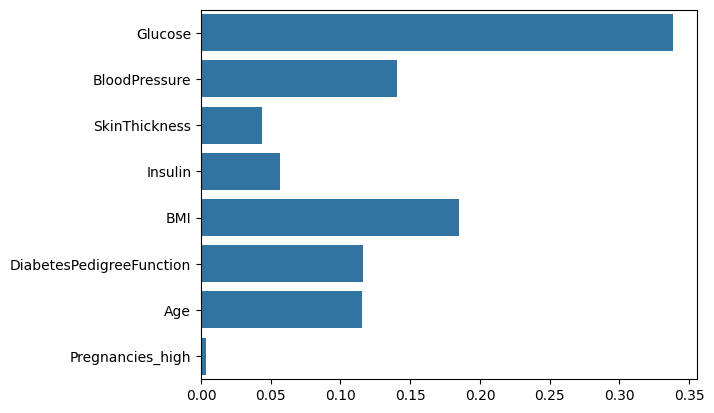

In [55]:
# Pregnancies가 학습에 있어서 중요한 역할을 하진 않았다.
sns.barplot(x=model.feature_importances_, y=feature_names)


In [57]:
# 정확도 측정 - 임신 횟수를 범주화 후에 정확도가 약간 올라감
model.score(X_test, y_test)


0.7467532467532467

## 나이 - 범주형 변수를 수치형 변수로 변환 (one-hot encoding)

/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_50662/186946436.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], label="0")
/var/folders/_p/_hqx0w4j6xq35y_7s8t5r5jc0000gn/T/ipykernel_50662/186946436.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Age"], label

<Axes: xlabel='Age', ylabel='Density'>

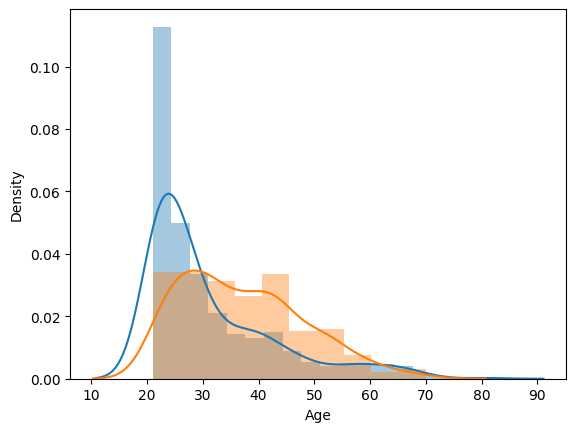

In [63]:
# 나이대에 따라 발병률이 차이가 난다

df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]

sns.distplot(df_0["Age"], label="0")
sns.distplot(df_1["Age"], label="1")


In [85]:
# One-Hot encoding
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (25 <= df["Age"]) & (df["Age"] < 60)
df["Age_high"] = 60 < df["Age"]

df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

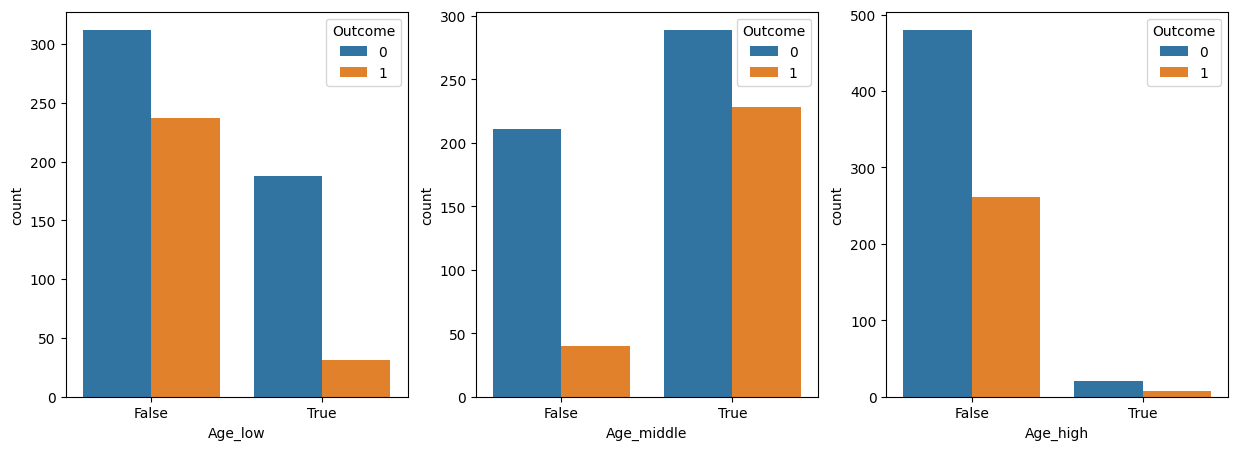

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 나이가 적을때는 발병률이 낮다
sns.countplot(
    data=df,
    x="Age_low",
    hue="Outcome",
    ax=axes[0],
)

# 나이가 중간인 경우 큰 차이를 보이지 않는다
sns.countplot(
    data=df,
    x="Age_middle",
    hue="Outcome",
    ax=axes[1],
)

# 나이가 많은 경우에 대한 모수는 적지만 발병 케이스가 적다
sns.countplot(
    data=df,
    x="Age_high",
    hue="Outcome",
    ax=axes[2],
)

In [80]:
# feature engineering 후 재훈련
split_count = int(len(X) * 0.8)
train = df[:split_count].copy()
test = df[split_count:].copy()

feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")  # 범주형인 Pregnancies_high 로 대체
feature_names.remove("Age")  # 수치형인 Age_low, Age_middle, Age_high 로 대체
feature_names.remove("Outcome")
print(f"features: {feature_names}")

label_name = "Outcome"
print(f"label: {label_name}")

X_train, y_train = train[feature_names], train[label_name]
X_test, y_test = test[feature_names], test[label_name]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies_high', 'Age_low', 'Age_middle', 'Age_high']
label: Outcome


DecisionTreeClassifier()

<Axes: >

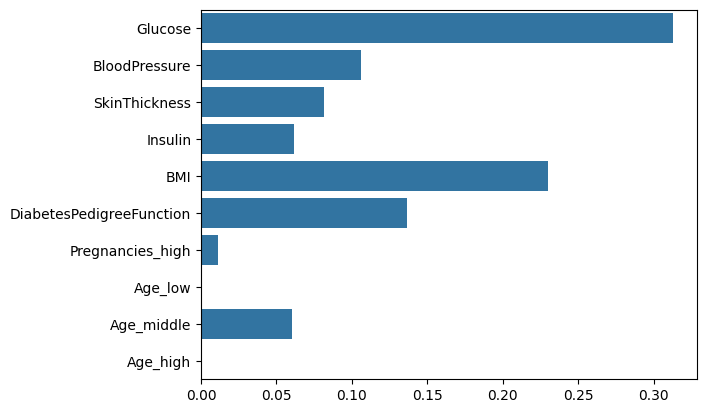

In [82]:
# Age_middle외에는 모델 학습에 영향을 주지 않는다
sns.barplot(x=model.feature_importances_, y=feature_names)

In [84]:
# 정확도가 떨어졌다
# - feature engineering을 한다고 항상 성능이 올라가는 것은 아니다
accuracy = model.score(X_test, y_test)
print(f"accuracy: {accuracy}")

accuracy: 0.6818181818181818


features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies_high', 'Age_low', 'Age_middle', 'Age_high']
label: Outcome
accuracy: 0.6688311688311688


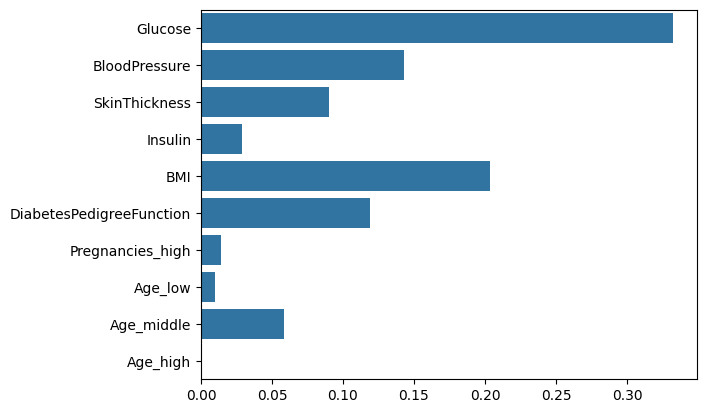

In [87]:
# 어떻게 범주화를 하냐에 따라서도 성능이 달라질 수 있다.

df["Age_low"] = df["Age"] < 30  # 기존에는 25세 기준
df["Age_middle"] = (30 <= df["Age"]) & (df["Age"] < 60)  # 기존에는 25세 기준
df["Age_high"] = 60 < df["Age"]

split_count = int(len(X) * 0.8)
train = df[:split_count].copy()
test = df[split_count:].copy()

feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")  # 범주형인 Pregnancies_high 로 대체
feature_names.remove("Age")  # 수치형인 Age_low, Age_middle, Age_high 로 대체
feature_names.remove("Outcome")
print(f"features: {feature_names}")

label_name = "Outcome"
print(f"label: {label_name}")

X_train, y_train = train[feature_names], train[label_name]
X_test, y_test = test[feature_names], test[label_name]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

sns.barplot(x=model.feature_importances_, y=feature_names)
accuracy = model.score(X_test, y_test)
print(f"accuracy: {accuracy}")  # 모델 성능이 더 떨어짐


## 결측치 다루기


In [89]:
# 혈압과 같은 0일 수 없는 컬럼에 대해 min 값이 0인 데이터를 결측치로 볼 수 있다.
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

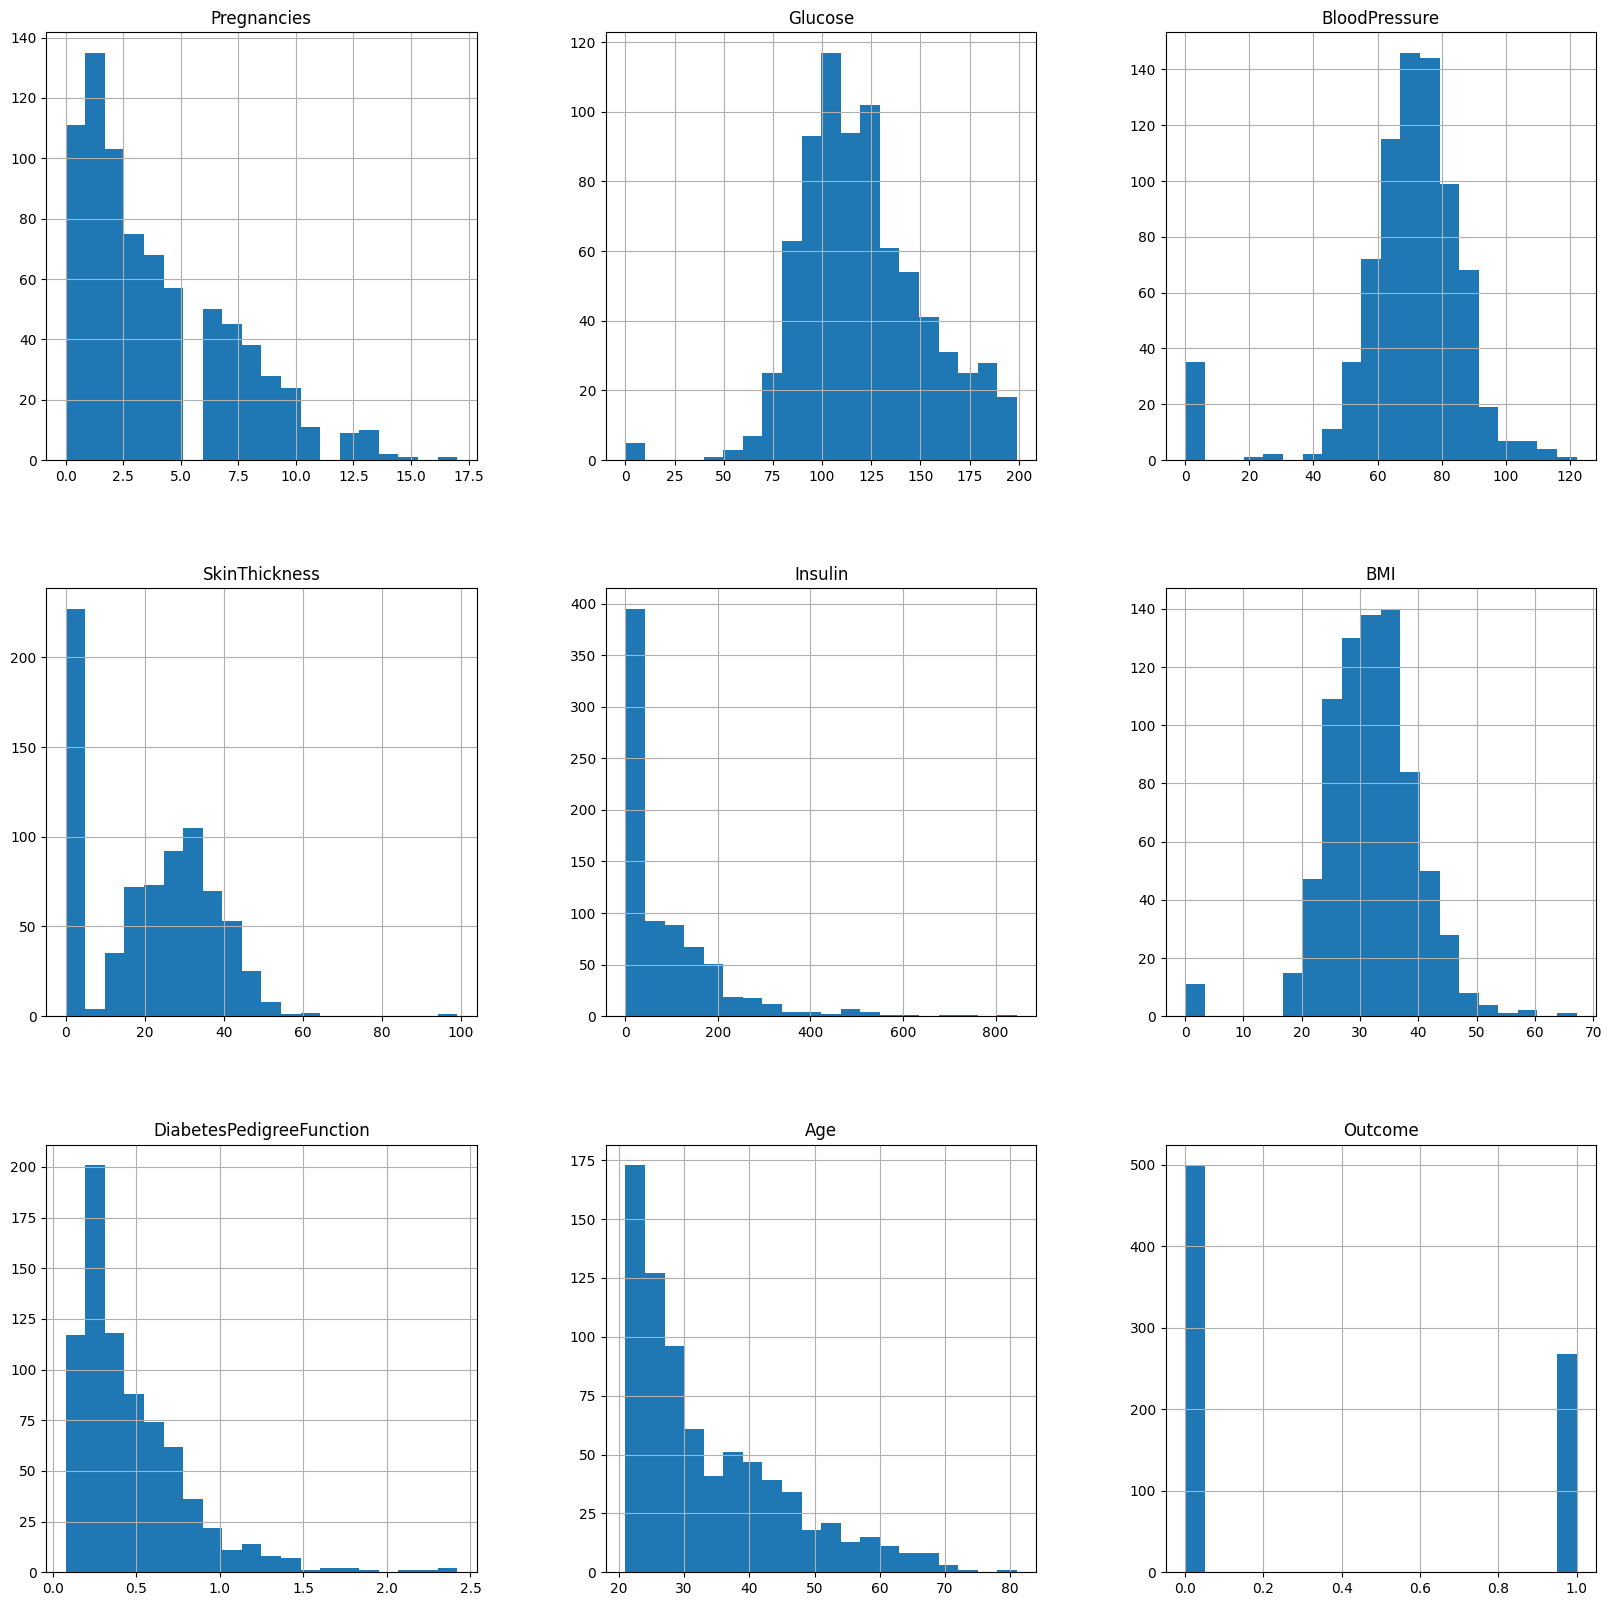

In [96]:
# 0인 값들이 많아서 예측을 하기가 쉽지않다. (Outcome 제외)
pd.read_csv("../data/diabetes.csv").hist(bins=20, figsize=(20, 20))


In [99]:
import numpy as np

# 결측치 처리
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()


,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [102]:
# 결측치 비율이 48%로 꽤 높다
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [118]:
# 결측치를 어떤 값으로 채울지 확인
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

### 결측치를 평균값으로 대체하기

In [134]:
# 결측치 채우기
# 결측치를 인슐린 수치의 평균값을 사용한다
mean_of_Insulin_nan_0 = int(
    df[df["Outcome"] == 0]["Insulin_nan"].mean()
)

mean_of_Insulin_nan_1 = int(
    df[df["Outcome"] == 1]["Insulin_nan"].mean()
)

# df.loc(condition, column name)
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = mean_of_Insulin_nan_0
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = mean_of_Insulin_nan_1

df["Insulin_nan"].isnull().sum()  # 결측치가 모두 제거되었음을 확인한다,

0

In [138]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")  # 범주형인 Pregnancies_high 로 대체
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")  # 결측치를 제거한 Insulin_nan으로 대체
feature_names.remove("Outcome")

feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan']

In [139]:
split_count = int(len(X) * 0.8)
train = df[:split_count].copy()
test = df[split_count:].copy()


X_train, y_train = train[feature_names], train[label_name]
X_test, y_test = test[feature_names], test[label_name]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

<Axes: >

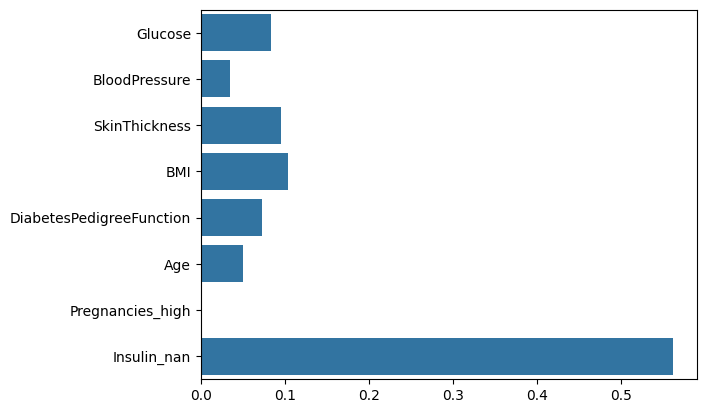

In [143]:
# Insulin이 학습에 있어서 가장 중요한 역할로 바뀌었다. (기존에는 Glucose)
sns.barplot(
    x=model.feature_importances_,
    y=feature_names,
)

In [144]:
accuracy = model.score(X_test, y_test)
print(f"accuracy: {accuracy}")  # 성능이 개선되었다.


accuracy: 0.8311688311688312


### 결측치를 중앙값으로 대체하기


In [151]:
# 결측치 채우기
# 결측치를 인슐린 수치의 중앙값을 사용한다

df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)

median_of_Insulin_nan_0 = df[df["Outcome"] == 0]["Insulin_nan"].median()

median_of_Insulin_nan_1 = df[df["Outcome"] == 1]["Insulin_nan"].median()

# df.loc(condition, column name)
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = median_of_Insulin_nan_0
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = median_of_Insulin_nan_1

df["Insulin_nan"].isnull().sum()  # 결측치가 모두 제거되었음을 확인한다,


0

In [153]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")  # 범주형인 Pregnancies_high 로 대체
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")  # 결측치를 제거한 Insulin_nan으로 대체
feature_names.remove("Outcome")

split_count = int(len(X) * 0.8)
train = df[:split_count].copy()
test = df[split_count:].copy()


X_train, y_train = train[feature_names], train[label_name]
X_test, y_test = test[feature_names], test[label_name]

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

<Axes: >

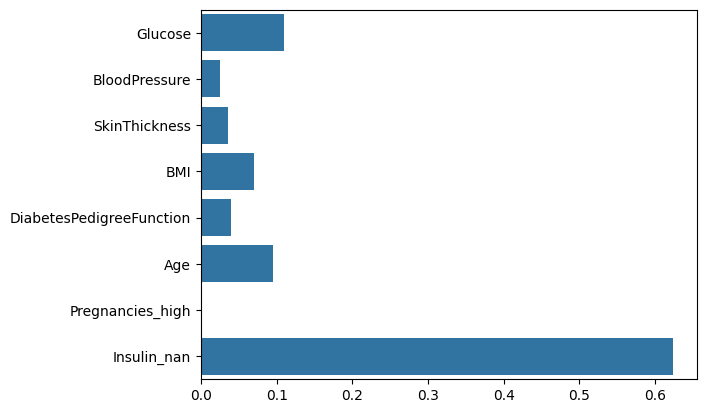

In [154]:
# Insulin이 학습에 있어서 가장 중요한 역할로 바뀌었다. (기존에는 Glucose)
sns.barplot(
    x=model.feature_importances_,
    y=feature_names,
)


In [155]:
accuracy = model.score(X_test, y_test)
print(f"accuracy: {accuracy}")  # 성능이 평균값에 비해 더 개선되었다.


accuracy: 0.9025974025974026


연령대 별, 발병 여부 별 인슐린 수치의 중앙값과 같은 더 상세화된 결측치 처리를 한다면 성능이 더 높아질 수도 있다.
